In [268]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
print(np.__version__)
import pandas as pd
print(pd.__version__)

1.16.4
0.24.2


# Numpy basics

## Creating arrays

In [54]:
multidata = np.array(range(1,4))
multidata

array([1, 2, 3])

In [55]:
np_full = np.full((3,3),10)
np_full

array([[10, 10, 10],
       [10, 10, 10],
       [10, 10, 10]])

In [171]:
np_zeros_like = np.zeros_like(np_full)
print(np_empty_like)

[[0 0 0]
 [0 0 0]
 [0 0 0]]


### Create array with list

In [56]:
multidata = np.array([range(i,i+3) for i in [1,2,3]])
print(multidata)

[[1 2 3]
 [2 3 4]
 [3 4 5]]


### Create array with random methods

In [197]:
np.random.randn(3,3)

array([[-1.64873098,  0.46898495, -1.15908269],
       [-1.06216178,  0.06311471,  0.79011774],
       [ 0.07668003,  0.09386925,  0.86068361]])

In [57]:
np.random.random((3,3))

array([[0.69143379, 0.36142168, 0.66880856],
       [0.81085892, 0.01893826, 0.15459884],
       [0.15967373, 0.89248544, 0.90800625]])

In [58]:
np.random.normal(0,1,(3,3))

array([[ 0.40173362, -1.10818789, -0.53923304],
       [-0.13200942,  0.57905394, -0.71596704],
       [ 0.09166151, -0.39772873, -0.12024704]])

In [59]:
np.random.seed(0)
np.random.randint(0,10, 6)

array([5, 0, 3, 3, 7, 9])

In [60]:
np.random.randint(0,10,(3,3))

array([[3, 5, 2],
       [4, 7, 6],
       [8, 8, 1]])

x: [[4 7 6 9]
 [6 3 5 1]
 [8 2 5 2]]
y: [[6.78231554 2.93603184 2.41621498 5.51116494]
 [7.29296316 6.01052677 7.37483202 3.12979177]
 [9.82982183 5.59779351 9.65347218 5.85959614]]
x>3: [4 7 6 9 6 5 8 5]
the conditions for (x>3): [[ True  True  True  True]
 [ True False  True False]
 [ True False  True False]]
y<=5 [[False False False False]
 [False False False False]
 [False False False False]]
z: [ 1.59149851 -0.56689478 -0.02381511 -0.16465653 -1.42962741  2.02549783
  0.76962459 -0.68304508 -0.6115557  -0.10331842  0.4186876  -0.62380495
 -0.27999296 -0.35464278  1.67722647 -0.60966902 -1.3159027  -0.6684342
 -0.63820965 -1.28432716 -0.69378859 -1.48398222  0.35924481  0.16532668
 -0.90141325 -1.18379731 -0.04049712  0.09028087 -0.03638785  1.10968457
  0.64567993 -1.21292149 -0.63059805 -1.26819104  1.41348371  0.58581373
 -0.86830626  2.05141538  0.16434505  0.73883437 -0.13006365  0.39582883
 -0.12104582  0.61115917  0.41936993  0.57051538 -0.42153348  0.32038791
 -1.52782284  

(array([ 0.,  1.,  5., 29., 34., 23.,  7.,  1.,  0.]),
 array([-4.        , -3.11111111, -2.22222222, -1.33333333, -0.44444444,
         0.44444444,  1.33333333,  2.22222222,  3.11111111,  4.        ]),
 <a list of 9 Patch objects>)

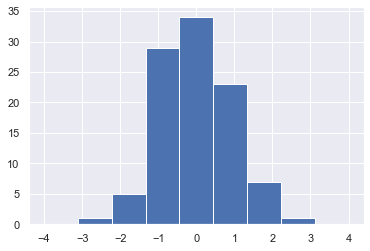

In [61]:
rng = np.random.RandomState(255)
x = rng.randint(1,10,(3,4))
y = rng.uniform(1,10,(3,4))
z = rng.randn(100)
print("x:",x)
print("y:",y)
print("x>3:", x[x>3])
print("the conditions for (x>3):", x>3)
print("y<=5", np.less_equal(y,0.5))
print("z:",z)
bins = np.linspace(-4,4,10)
plt.hist(z,bins)

In [62]:
np.zeros((2,3), dtype="int") # "np.int16"

array([[0, 0, 0],
       [0, 0, 0]])

In [63]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [64]:
np.full((3,5),3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [65]:
print(np.empty(5))
x= np.arange(5)
y=np.empty(5)
np.multiply(x,10,out=y)

[ 1.   2.   2.5  5.  10. ]


array([ 0., 10., 20., 30., 40.])

In [66]:
int_arr = np.array(range(1,5),dtype = np.int32)
print(int_arr, int_arr.dtype)
float_arr = int_arr.astype(np.float32)
print(float_arr,float_arr.dtype)

[1 2 3 4] int32
[1. 2. 3. 4.] float32


In [67]:
str_arr = np.array(['11','22','33'],dtype=np.string_)
print(str_arr)
float_arr = str_arr.astype(np.float64)
print(float_arr)

[b'11' b'22' b'33']
[11. 22. 33.]


## Array properties and slicing

In [68]:
my_grid = np.arange(16).reshape((4,4))
my_grid 
print(my_grid.shape)
print(my_grid.ndim)
print(my_grid.size)
print(my_grid.dtype)

(4, 4)
2
16
int64


In [69]:
my_grid[0][1:]

array([1, 2, 3])

In [70]:
my_grid[0][1] = 99
my_grid 

array([[ 0, 99,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [71]:
sub_arrays = my_grid[:2, :3] # views when using slice but in python slice will be copies
sub_arrays

array([[ 0, 99,  2],
       [ 4,  5,  6]])

In [72]:
sub_arrays[0][1] = 999 # because of view, the original will be influenced
my_grid

array([[  0, 999,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11],
       [ 12,  13,  14,  15]])

In [73]:
sub_arrays_copy = my_grid[:2, :3].copy()
sub_arrays_copy[0][1] = 9999
my_grid

array([[  0, 999,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11],
       [ 12,  13,  14,  15]])

In [74]:
sub_arrays2 = my_grid[:3, ::2]
sub_arrays2


array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [75]:
first_row = my_grid[0]
first_row

array([  0, 999,   2,   3])

In [76]:
first_column = my_grid[:,0]
first_column

array([ 0,  4,  8, 12])

In [77]:
test = my_grid[1,:]
print(test, test.shape)

test2 = my_grid[1:2, :]
print(test2, test2.shape)

test3 = my_grid[[1], :]
print(test3, test3.shape)

[4 5 6 7] (4,)
[[4 5 6 7]] (1, 4)
[[4 5 6 7]] (1, 4)


## Reshaping and concatenating

In [200]:
x0 = np.arange(9).reshape((3,3))
2**x0

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

In [208]:
arr = np.arange(15).reshape((3,-1)) # -1 will help you to calculate the dimension automatically
print(arr.shape)
print("reshape by other's shape:",np.arange(15).reshape(arr.shape))

print("ravel back:",np.arange(15).reshape(arr.shape).ravel()) # use ravel to come back

(3, 5)
reshape by other's shape: [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
ravel back: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [78]:
x= np.arange(7,10)
y= np.arange(1,4)
np.concatenate((x,y))

array([7, 8, 9, 1, 2, 3])

In [79]:
x= np.array([[1,2],
              [3,4]])
y= np.array([[9,10]])
j = np.concatenate((x,y),axis = 0)
k = np.concatenate((x,y.T),axis = 1)
l = np.concatenate((x,y),axis = None)
print(j)
print(k)
print(l)

[[ 1  2]
 [ 3  4]
 [ 9 10]]
[[ 1  2  9]
 [ 3  4 10]]
[ 1  2  3  4  9 10]


In [80]:
my_grid

array([[  0, 999,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11],
       [ 12,  13,  14,  15]])

In [214]:
h1,h2,h3 = np.vsplit(my_grid,[1,2]) # vertically divide it into 3 sections (row-wise)
print(h1,'\n\n',h2,'\n\n',h3)

[[  0 999   2   3]] 

 [[4 5 6 7]] 

 [[ 8  9 10 11]
 [12 13 14 15]]


In [215]:
h1,h2= np.hsplit(my_grid,2) # horizontally
print(h1)
print(h2)

[[  0 999]
 [  4   5]
 [  8   9]
 [ 12  13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


In [221]:
x = np.array([[1,2,3],[4,5,6]])
grid = np.array([[9,8,7],
                [9,8,6]])
np.vstack((x,grid))

array([[1, 2, 3],
       [4, 5, 6],
       [9, 8, 7],
       [9, 8, 6]])

In [222]:
y = np.array([[1],
             [2]])
np.hstack((grid, y))

array([[9, 8, 7, 1],
       [9, 8, 6, 2]])

In [223]:
print(np.r_[x,grid]) #  stack by adding a row

[[1 2 3]
 [4 5 6]
 [9 8 7]
 [9 8 6]]


In [224]:
print(np.c_[y,grid]) # stack by adding a column

[[1 9 8 7]
 [2 9 8 6]]


In [225]:
print(np.c_[1:6,-5:0]) # creating a new array

[[ 1 -5]
 [ 2 -4]
 [ 3 -3]
 [ 4 -2]
 [ 5 -1]]


In [227]:
arr = np.arange(3) # repeat
print(arr.repeat(3))
print(arr.repeat([2,3,4]))

[0 0 0 1 1 1 2 2 2]
[0 0 1 1 1 2 2 2 2]


In [232]:
arr = np.arange(6).reshape((2,3))
print(arr)

[[0 1 2]
 [3 4 5]]


In [233]:
arr.repeat(2,axis =0)

array([[0, 1, 2],
       [0, 1, 2],
       [3, 4, 5],
       [3, 4, 5]])

In [236]:
print(arr)
print(np.tile(arr,(2,3))) # 0-axis direction: repeat 2 times, 1-axis direction: repeat 3 times

[[0 1 2]
 [3 4 5]]
[[0 1 2 0 1 2 0 1 2]
 [3 4 5 3 4 5 3 4 5]
 [0 1 2 0 1 2 0 1 2]
 [3 4 5 3 4 5 3 4 5]]


## Ufuncs

In [86]:
np.random.seed(0)

def get_reciprocol(value):
    output = np.empty(len(value))
    for i in range(len(value)):
        output[i] = 1.0/value[i]
    return output

my_value = np.random.randint(1,10,1000000)
%timeit get_reciprocol(my_value)

1.81 s ± 70.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [87]:
%timeit (1.0/my_value)

1.17 ms ± 61 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [88]:
np.arange(5)/ np.arange(1,6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [89]:
x = np.arange(1,4)
print(x)
print(np.add.reduce(x))
print(np.multiply.reduce(x))
print(np.add.accumulate(x))
print(np.multiply.accumulate(x))

[1 2 3]
6
6
[1 3 6]
[1 2 6]


In [90]:
x = np.random.normal(0,1,10)
abs(x)

array([0.37023505, 0.46147507, 1.76086415, 0.65411776, 0.71157957,
       0.45484658, 2.05724558, 0.55988193, 0.59935751, 1.33851942])

In [91]:
theta = np.linspace(0,np.pi,3)
print(theta)
print(np.sin(theta))

[0.         1.57079633 3.14159265]
[0.0000000e+00 1.0000000e+00 1.2246468e-16]


In [92]:
x = np.arange(1,6)
print("e^x = ", np.exp(x))
print("2^x = ", np.exp2(x))
print("3^x = ", np.power(3,x))
print("ln(x) = ", np.log(x))
print("log2(x) = ", np.log2(x))
print("log10(x) = ", np.log10(x))

e^x =  [  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591 ]
2^x =  [ 2.  4.  8. 16. 32.]
3^x =  [  3   9  27  81 243]
ln(x) =  [0.         0.69314718 1.09861229 1.38629436 1.60943791]
log2(x) =  [0.         1.         1.5849625  2.         2.32192809]
log10(x) =  [0.         0.30103    0.47712125 0.60205999 0.69897   ]


In [93]:
%timeit sum(np.random.random(100000))


9.45 ms ± 456 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [94]:
%timeit np.sum(np.random.random(100000))

959 µs ± 37.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [95]:
big_array = np.random.random(1000000)
print(np.min(big_array))
print(np.max(big_array))

1.4410671467235403e-07
0.9999994091672321


In [96]:
matrix_array = np.random.random((3,4))
print(matrix_array)

[[0.67189782 0.44097281 0.12629736 0.10478165]
 [0.51236191 0.32590254 0.27782828 0.92741824]
 [0.68480691 0.46026353 0.10552753 0.91044938]]


In [97]:
print("min value of each column:", matrix_array.min(axis=0))
print("min value of each row:", matrix_array.min(axis=1)) # np.min also works

min value of each column: [0.51236191 0.32590254 0.10552753 0.10478165]
min value of each row: [0.10478165 0.27782828 0.10552753]


In [98]:
print("np.sum =" ,np.sum(matrix_array))
print("np.prod =" ,np.prod(np.arange(1,4)))
print("np.prod =" ,np.prod(np.arange(1,5).reshape((2,2))))
print("np.prod =" ,np.prod(np.arange(1,5).reshape((2,2)), axis = 1))
print("np.mean =" , np.mean(np.arange(1,5)))
print("np.std =" , np.std(np.arange(1,5)))
print("np.var =" , np.std(np.arange(1,5)))
print("np.min =" , np.std(np.arange(1,5)))
print("np.argmin = ", np.argmin(matrix_array)) # 0.132
print("np.argmax = ", np.argmax(matrix_array)) # 0.855
print("np.median = ", np.median(np.arange(1,5)))

np.sum = 5.548507938178444
np.prod = 6
np.prod = 24
np.prod = [ 2 12]
np.mean = 2.5
np.std = 1.118033988749895
np.var = 1.118033988749895
np.min = 1.118033988749895
np.argmin =  3
np.argmax =  7
np.median =  2.5


In [99]:
x = rng.randint(0,10,(3,4))
print(x)
print(np.sum(x>5,axis = 1)) # axis =1 means the calc is along the horizontal axis, i.e. calc the value in each row

[[0 6 4 4]
 [5 8 9 9]
 [3 4 8 0]]
[1 3 1]


In [100]:
print("check if any value is greater than 5 in each row:", np.any(x>5, axis =1))

check if any value is greater than 5 in each row: [ True  True  True]


In [101]:
print(np.sum(x, axis=1))
print("check if all is greater than 1:",np.all(x>1))

[14 31 15]
check if all is greater than 1: False


In [102]:
!head -4 ../data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [103]:
import os
current_work_directory = os.getcwd()
print(os.path.relpath(current_work_directory))
print(os.path.abspath(current_work_directory))
from pathlib import Path
path = Path(current_work_directory)
print(path.parent)
print(os.listdir(path.parent))
print(os.listdir(path.parent))
# p = path.parent.glob('**/*') #Use glob to list all files and directories. And then filter it.
# files = [x for x in p if x.is_file()]
# print(files)

.
/Users/yemao/Documents/Project workspaces/ScientificTutorialSample/notebooks
/Users/yemao/Documents/Project workspaces/ScientificTutorialSample
['.DS_Store', 'requirements.txt', 'pandas_practice.py', 'models', 'Rainydays.py', 'README.md', '.git', 'main.py', 'data', 'notebooks', 'numpy_practice.py', '.idea']
['.DS_Store', 'requirements.txt', 'pandas_practice.py', 'models', 'Rainydays.py', 'README.md', '.git', 'main.py', 'data', 'notebooks', 'numpy_practice.py', '.idea']


In [104]:
all_data = pd.read_csv("../data/president_heights.csv")
president_heights_data = np.array(all_data['height(cm)'])
print(president_heights_data)
print("mean height:",president_heights_data.mean())
print("sd of height:",president_heights_data.std())
print("min height index:",president_heights_data.argmin())
print("president of min height is :", all_data["name"][president_heights_data.argmin()])
print("25th percentile:", np.percentile(president_heights_data,25))
print("median", np.median(president_heights_data))

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]
mean height: 179.73809523809524
sd of height: 6.931843442745892
min height index: 3
president of min height is : James Madison
25th percentile: 174.25
median 182.0


Text(0, 0.5, 'number')

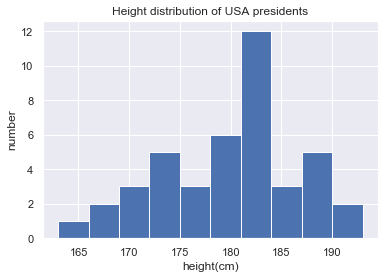

In [105]:
plt.hist(president_heights_data)
plt.title("Height distribution of USA presidents")
plt.xlabel("height(cm)")
plt.ylabel("number")

## Broadcasting

In [106]:
a = np.arange(3)
b = np.arange(3)[:,np.newaxis]
print(a)
print(b)
print(a+b)
print(b.shape)

[0 1 2]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]
(3, 1)


In [107]:
M = np.ones((2,3))
M

array([[1., 1., 1.],
       [1., 1., 1.]])

In [108]:
M.shape

(2, 3)

In [109]:
a.shape

(3,)

In [110]:
M+a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Center an array

In [111]:
X= np.random.random((10,3))
XMean= X.mean(0) # aggregate across the first dimension
print(XMean)
X_centered = X-XMean
print(X_centered.mean(0))

[0.55733549 0.47116067 0.41193496]
[5.55111512e-17 5.55111512e-18 1.11022302e-17]


### Plotting a two-dimensional function

In [112]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:, np.newaxis]
z= np.sin(x) ** 10 + np.cos(10+y*x ) * np.cos(x)

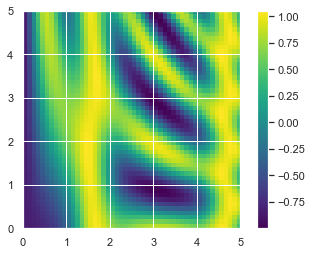

In [113]:
plt.imshow(z, origin = "lower", extent = [0,5,0,5], cmap="viridis")
plt.colorbar()


### Comparison and Mask

In [114]:
print(my_grid)
my_row_mask = np.array([1,0,0,1],dtype=np.bool)
print(my_row_mask)
print(my_grid[my_row_mask,2])

[[  0 999   2   3]
 [  4   5   6   7]
 [  8   9  10  11]
 [ 12  13  14  15]]
[ True False False  True]
[ 2 14]


In [115]:
!head -4 ../data/Seattle2014.csv
rain_fall = pd.read_csv("../data/Seattle2014.csv")["PRCP"]

STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999


In [116]:
rain_fall_values = rain_fall.values
np.any((rain_fall_values - np.array(rain_fall))>0)
# same as rain_fall.values

False

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

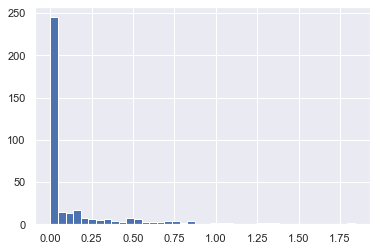

In [117]:
inches = rain_fall_values/254 
plt.hist(inches,40)

In [118]:
np.sum((inches >0.5)&(inches <1)) # count the number of days

29

In [119]:
x = rng.randint(0,10,(3,4))
print(x)
np.sum(x[x<5])

[[5 7 7 6]
 [1 8 5 0]
 [5 9 5 6]]


1

In [120]:
rainy = (inches>0) # create a mask of all rainy days
print(rainy)
print("median precip on rainy days in 2014：", np.median(inches[rainy]))

[False  True  True False False  True  True  True  True  True  True  True
 False False False False False False False False False  True False False
 False False False  True  True False  True  True False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False  True
  True  True  True  True  True False  True  True  True False False  True
  True  True  True  True False  True False False False False False  True
  True  True  True  True False False False False  True False  True False
 False  True False False False False False False  True  True  True False
  True False  True  True  True  True False  True  True False False False
 False False  True  True  True False False  True  True  True False False
 False False False False False False False False False False  True False
  True False False False False False False False False False False False
 False False False False False False  True  True Fa

In [121]:
summer = ( (np.arange(365) - 172> 0) & (np.arange(365)-172<90) )

In [172]:
print("median precip on non-summer days in 2014:", np.median(inches[rainy & ~ summer]))

median precip on non-summer days in 2014: 0.20078740157480315


In [187]:
x = np.arange(1,5)
y = np.arange(-4,0)[::-1]
print(x)
print(y)
condition = np.array([True,False,False,True])
print("condition true got 1st otherwise 2nd:", np.where(condition, x,y))

[1 2 3 4]
[-1 -2 -3 -4]
condition true got 1st otherwise 2nd: [ 1 -2 -3  4]


In [198]:
arr = np.random.randn(4,4)
print(arr)
print(np.where(arr>0,99, -99))
print(np.where(arr>0,99,arr))

[[-0.21471451 -0.3945891   0.33883843 -1.75401299]
 [-1.95374082  0.97374816  1.12025767  0.3152695 ]
 [-0.42674107 -0.21778519  0.21002688 -0.62462741]
 [-0.38171794  0.70160057  0.8531063   1.42864447]]
[[-99 -99  99 -99]
 [-99  99  99  99]
 [-99 -99  99 -99]
 [-99  99  99  99]]
[[-0.21471451 -0.3945891  99.         -1.75401299]
 [-1.95374082 99.         99.         99.        ]
 [-0.42674107 -0.21778519 99.         -0.62462741]
 [-0.38171794 99.         99.         99.        ]]


## Fancy indexing

In [123]:
x= rng.randint(100, size=10)
print(x)

[50 55 66 47 70 57 42 13 82 31]


In [124]:
ind=[1,2,3]
x[ind]

array([55, 66, 47])

In [125]:
a = np.array(range(6)).reshape((2,3))
a

array([[0, 1, 2],
       [3, 4, 5]])

In [126]:
print(a[[0,1],[0,2]])
print(a[[0,1],[0,2]].shape)

[0 5]
(2,)


In [127]:
ind2 = np.array([[3,4],
                [1,2]])
x[ind2] # index influences the shape, NOT x!

array([[47, 70],
       [55, 66]])

In [128]:
X= np.arange(12).reshape((3,4))
print(X)
row_index = np.array([0,1,2])
column_index = np.array([1,1,1])
X[row_index,column_index]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([1, 5, 9])

In [129]:
X[row_index[:,np.newaxis],column_index] # return the broadcasted shape of the index, not X!

array([[1, 1, 1],
       [5, 5, 5],
       [9, 9, 9]])

In [130]:
X[2, [0,1,2]] # combine fancy index with normal index

array([ 8,  9, 10])

In [131]:
X[1:, [0,1,2]] # combine fancy index with slicing

array([[ 4,  5,  6],
       [ 8,  9, 10]])

In [132]:
masked_column_index = np.array([0,1,0,1])
X[row_index[:,np.newaxis],masked_column_index]

array([[0, 1, 0, 1],
       [4, 5, 4, 5],
       [8, 9, 8, 9]])

### Selecting random points 

In [133]:
mean = [0,0]
cov = [[1,2],
       [2,5]] # cov matrix
X= rng.multivariate_normal(mean,cov, 100)
X.shape

(100, 2)

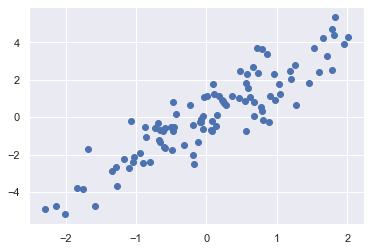

In [134]:
plt.scatter(X[:,0],X[:,1])

In [135]:
random_20_indices= np.random.choice(X.shape[0],20,replace=False)

(20, 2)


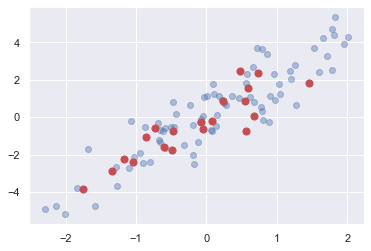

In [136]:
selection=X[random_20_indices]
print(selection.shape)
plt.scatter(X[:,0],X[:,1], alpha=0.4) 
plt.scatter(selection[:,0],selection[:,1],marker="o",c=["r"],facecolor='None', s = 50)

In [137]:
x = np.arange(10)
i = np.array([2,1,4,5])
x[i] = 99 # using fancy index to 
print(x)

[ 0 99 99  3 99 99  6  7  8  9]


In [138]:
x[i] -=10
print(x)

[ 0 89 89  3 89 89  6  7  8  9]


In [139]:
x= np.zeros(10)
i = [2,3,3,4,4]
np.add.at(x,i,1)
print(x)

[0. 0. 1. 2. 2. 0. 0. 0. 0. 0.]


In [140]:
x= rng.randn(100)
bins = np.linspace(-5,5,20)
counts= np.zeros_like(bins)
i = np.searchsorted(bins,x)
np.add.at(counts,i,1)

(array([ 0.,  0.,  0.,  0.,  1.,  2.,  5., 14., 23., 17., 19., 12.,  3.,
         2.,  1.,  1.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

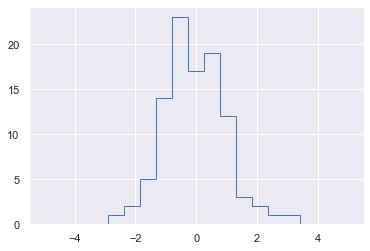

In [141]:
plt.hist(x,bins,histtype="step")

/Users/yemao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  """Entry point for launching an IPython kernel.


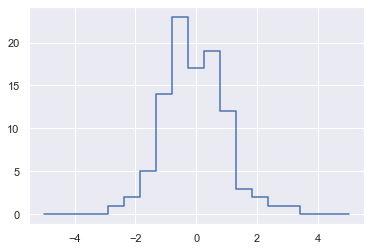

In [142]:
plt.plot(bins,counts,linestyle="steps")

### Sorting in Numpy

In [143]:
rng = np.random.RandomState(255)
x = rng.randint(0,10,size=10)
np.sort(x)


array([2, 3, 4, 5, 5, 6, 8, 9, 9, 9])

In [144]:
x.sort()
print(x)

[2 3 4 5 5 6 8 9 9 9]


In [145]:
index_sorted = np.argsort(x) # sort the index!
print(index_sorted)
print(x[index_sorted])

[0 1 2 3 4 5 6 7 8 9]
[2 3 4 5 5 6 8 9 9 9]


In [146]:
rng = np.random.RandomState(255)
x = rng.randint(0,10,size=(3,4))
x

array([[3, 9, 9, 6],
       [5, 8, 5, 9],
       [2, 4, 9, 0]])

In [147]:
# sorting column => axis =0
sorted_arr = np.sort(x, axis=0)
print(sorted_arr)
# sorting row => axis =1
sorted_arr = np.sort(x, axis=1)
print(sorted_arr)

[[2 4 5 0]
 [3 8 9 6]
 [5 9 9 9]]
[[3 6 9 9]
 [5 5 8 9]
 [0 2 4 9]]


### Partitioning - sort the smallest k values

In [148]:
rng = np.random.RandomState(255)
x = rng.randint(0,10,size=(4,4))
x

array([[3, 9, 9, 6],
       [5, 8, 5, 9],
       [2, 4, 9, 0],
       [7, 1, 4, 1]])

In [149]:
np.partition(x,2,axis =1) # first 2 slots of each row are the smallest values!

array([[3, 6, 9, 9],
       [5, 5, 8, 9],
       [0, 2, 4, 9],
       [1, 1, 4, 7]])

In [150]:
np.argpartition(x,2,axis = 1) # get indices of these two values

array([[0, 3, 2, 1],
       [0, 2, 1, 3],
       [3, 0, 1, 2],
       [1, 3, 2, 0]])

### K-Nearest Neighbors

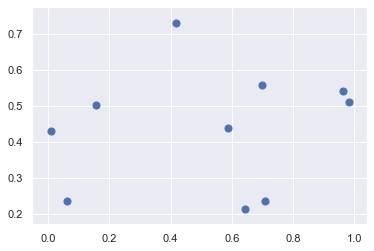

In [151]:
X = rng.rand(10,2)
plt.scatter(X[:,0],X[:,1], s= 50)

In [152]:
difference = X[:,np.newaxis,:] - X[np.newaxis,:,:] 
difference.shape

(10, 10, 2)

In [153]:
difference_square = difference**2
difference_square.shape


(10, 10, 2)

In [154]:
dist_sq = np.sum(difference_square,axis = -1)
dist_sq.shape

(10, 10)

In [155]:
nearest = np.argsort(dist_sq,axis= 1)
nearest # the leftmost is the index of the nearest neighbor (the point itself!)

array([[0, 3, 8, 2, 4, 5, 6, 1, 9, 7],
       [1, 7, 9, 6, 8, 2, 0, 3, 5, 4],
       [2, 8, 5, 4, 3, 6, 0, 1, 7, 9],
       [3, 0, 8, 2, 4, 5, 6, 1, 9, 7],
       [4, 5, 2, 3, 8, 0, 6, 1, 9, 7],
       [5, 4, 2, 8, 3, 0, 6, 1, 9, 7],
       [6, 2, 8, 1, 7, 0, 3, 5, 4, 9],
       [7, 1, 9, 6, 8, 0, 2, 3, 5, 4],
       [8, 2, 0, 3, 6, 5, 4, 1, 9, 7],
       [9, 7, 1, 8, 0, 6, 3, 2, 5, 4]])

In [156]:
K = 2 
# Locating smallest k neighbor means the k+1 squared distances comes first (including itself)
nearest_partition = np.argpartition(dist_sq,K+1,axis=1)

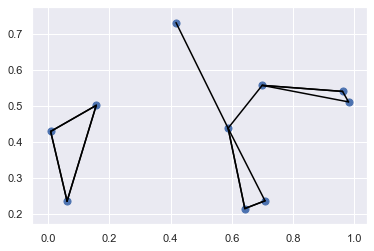

In [157]:
plt.scatter(X[:,0],X[:,1],s=50)
# Draw lines from each point to its nearest neighbor
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i,1:K+1]:
        # plot the line from X[i] to X[j]
        plt.plot(*zip(X[i],X[j]),color="black")

## Math - transpose

In [158]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

In [159]:
np.subtract(x,y)

array([[-4., -4.],
       [-4., -4.]])

In [160]:
np.multiply(x,y)

array([[ 5., 12.],
       [21., 32.]])

In [161]:
x*y # element wise multiply, same as np.multiple

array([[ 5., 12.],
       [21., 32.]])

In [162]:
v = np.array([9,10])
w = np.array([10,11])
print(v.shape)

(2,)


In [163]:
print(v.dot(w))#Dot product 
print(np.dot(v,w))

200
200


In [164]:
arr = np.arange(16).reshape(2,2,4)
print(arr, arr.shape)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]] (2, 2, 4)


In [165]:
print(arr.transpose((1,0,2)))

[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]


In [166]:
print(arr.transpose((0,2,1)))

[[[ 0  4]
  [ 1  5]
  [ 2  6]
  [ 3  7]]

 [[ 8 12]
  [ 9 13]
  [10 14]
  [11 15]]]


In [167]:
print(arr.swapaxes(1,2)) # swap 1-axis and 2-axis so it equals transpose((0,2,1))

[[[ 0  4]
  [ 1  5]
  [ 2  6]
  [ 3  7]]

 [[ 8 12]
  [ 9 13]
  [10 14]
  [11 15]]]


In [168]:
x = np.arange(24).reshape(2,3,4)
y = np.arange(8).reshape(4,2)
print(x, x.shape)
print()
print(y,y.shape)
result1 = np.matmul(x,y)
result2 = np.dot(x,y)
print(result1,result1.shape) # multidimensional multiply
print(result2,result2.shape)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]] (2, 3, 4)

[[0 1]
 [2 3]
 [4 5]
 [6 7]] (4, 2)
[[[ 28  34]
  [ 76  98]
  [124 162]]

 [[172 226]
  [220 290]
  [268 354]]] (2, 3, 2)
[[[ 28  34]
  [ 76  98]
  [124 162]]

 [[172 226]
  [220 290]
  [268 354]]] (2, 3, 2)


In [169]:
x = np.arange(24).reshape(2,3,4)
y = np.arange(16).reshape(2,4,2)
print(x.dot(y).shape)
print(np.matmul(x,y).shape)

(2, 3, 2, 2)
(2, 3, 2)


### Using Numpy to Simulate Softmax

In [253]:
m = np.random.rand(10,10)*10 + 1000
print(m)

[[1003.48078035 1003.33603259 1005.59052246 1002.09306867 1000.79269755
  1002.6699412  1004.9135475  1002.36679267 1006.90928324 1003.83510307]
 [1007.75916318 1009.64190732 1009.90197968 1002.95546898 1008.84099905
  1007.16347734 1003.98956088 1009.36480747 1008.7061465  1009.56478426]
 [1005.68637135 1000.98111634 1001.84907485 1000.12287052 1003.12251439
  1003.73698032 1009.23201618 1001.79512016 1005.38047208 1001.61649924]
 [1001.1339937  1005.09862173 1001.47411956 1002.1054314  1000.56817045
  1004.37590725 1008.06062755 1006.05211693 1000.67939628 1003.57079779]
 [1003.88755479 1009.43555262 1003.43338422 1000.34710197 1009.25923362
  1004.18904317 1000.53142876 1008.97188143 1002.92992296 1001.69076614]
 [1008.28331791 1006.07448977 1009.92793115 1003.19276487 1004.22220967
  1000.46057344 1006.92595732 1004.5172367  1007.18377423 1008.13379172]
 [1003.96816174 1000.03578315 1006.31847763 1005.89998997 1003.79984527
  1003.15048287 1004.81162995 1006.75537885 1008.17901821 

In [258]:
# np.exp(m) # too big

m_row_max = m.max(axis=1).reshape((10,1))
print(m_row_max)

[[1006.90928324]
 [1009.90197968]
 [1009.23201618]
 [1008.06062755]
 [1009.43555262]
 [1009.92793115]
 [1008.17901821]
 [1009.49104068]
 [1008.83684535]
 [1009.35563545]]


In [259]:
new_m = m - m_row_max
print(new_m)

[[-3.42850289 -3.57325065 -1.31876079 -4.81621458 -6.11658569 -4.23934204
  -1.99573574 -4.54249058  0.         -3.07418018]
 [-2.14281649 -0.26007235  0.         -6.9465107  -1.06098063 -2.73850234
  -5.9124188  -0.5371722  -1.19583317 -0.33719541]
 [-3.54564483 -8.25089984 -7.38294133 -9.10914566 -6.10950179 -5.49503586
   0.         -7.43689602 -3.85154411 -7.61551694]
 [-6.92663385 -2.96200582 -6.58650799 -5.95519615 -7.4924571  -3.6847203
   0.         -2.00851062 -7.38123127 -4.48982976]
 [-5.54799783  0.         -6.0021684  -9.08845065 -0.17631899 -5.24650945
  -8.90412385 -0.46367119 -6.50562965 -7.74478647]
 [-1.64461324 -3.85344138  0.         -6.73516628 -5.70572148 -9.46735771
  -3.00197383 -5.41069445 -2.74415692 -1.79413943]
 [-4.21085648 -8.14323507 -1.86054059 -2.27902824 -4.37917294 -5.02853534
  -3.36738826 -1.42363936  0.         -6.8949866 ]
 [-8.28414116 -5.37072077 -6.40347286 -8.04812691  0.         -8.11661167
  -5.31146435 -1.22254016 -6.05068063 -0.12293463]
 

In [264]:
m_exp = np.exp(new_m)
m_exp_row_sum = m_exp.sum(axis =1).reshape((10,1))
print(m_exp_row_sum.shape)
print(m_exp_row_sum)

(10, 1)
[[1.5454749 ]
 [3.90339039]
 [1.05850098]
 [1.2283628 ]
 [2.48113213]
 [1.50361685]
 [1.56850897]
 [2.19327091]
 [1.69103992]
 [1.65316161]]


In [266]:
m_softmax = m_exp / m_exp_row_sum
print(m_softmax)

[[2.09873765e-02 1.81591285e-02 1.73064308e-01 5.23941293e-03
  1.42737679e-03 9.32857242e-03 8.79429483e-02 6.88905182e-03
  6.47050300e-01 2.99115250e-02]
 [3.00569309e-02 1.97519521e-01 2.56187544e-01 2.46448822e-04
  8.86706680e-02 1.65669117e-02 6.93149882e-04 1.49715611e-01
  7.74843980e-02 1.82858816e-01]
 [2.72555373e-02 2.46597382e-04 5.87405561e-04 1.04533872e-04
  2.09887135e-03 3.88011844e-03 9.44732236e-01 5.56552106e-04
  2.00726348e-02 4.65512932e-04]
 [7.98867005e-04 4.21008204e-02 1.12250755e-03 2.11039874e-03
  4.53670530e-04 2.04371179e-02 8.14091733e-01 1.09241653e-01
  5.07043632e-04 9.13618855e-03]
 [1.56994799e-03 4.03041816e-01 9.96876810e-04 4.55287934e-05
  3.37890313e-01 2.12236466e-03 5.47442174e-05 2.53501346e-01
  6.02547165e-04 1.74514725e-04]
 [1.28415180e-01 1.41037464e-02 6.65063047e-01 7.90346017e-04
  2.21258246e-03 5.14329703e-05 3.30462473e-02 2.97185814e-03
  4.27652099e-02 1.10580351e-01]
 [9.45717142e-03 1.85332225e-04 9.91951602e-02 6.52745075e

## IO opearation

In [239]:
arr = np.loadtxt("../data/loadtext.txt",delimiter = ',')
arr

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.],
       [13., 14., 15., 16.]])

In [240]:
np.save("../data/some_array",arr) # will be an .npy file

In [244]:
arr2 = np.load("../data/some_array.npy").reshape((2,8))
print(arr2)

[[ 1.  2.  3.  4.  5.  6.  7.  8.]
 [ 9. 10. 11. 12. 13. 14. 15. 16.]]


In [245]:
arr3 = np.arange(15).reshape((3,5))
np.savez("../data/array_archive.npz", a = arr, b = arr2, c= arr3)

In [249]:
arch = np.load("../data/array_archive.npz")
print("a:\n",arch["a"])
print("b:\n",arch["b"])
print("c:\n",arch["c"])

a:
 [[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]
b:
 [[ 1.  2.  3.  4.  5.  6.  7.  8.]
 [ 9. 10. 11. 12. 13. 14. 15. 16.]]
c:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


# Pandas Basics

## Creating Series

In [271]:
# A series is essetially an array
my_series = pd.Series(["a","b","c"], index = ["row 1","row 2","row 3"]) # using array
my_series

row 1    a
row 2    b
row 3    c
dtype: object

In [302]:
cities = {"BJ":1000,"SH":2000,"HZ":5000} # using dictionary
apts = pd.Series(cities)
print(apts)
print(apts["HZ"])
print(apts[["BJ","SH"]])

BJ    1000
SH    2000
HZ    5000
dtype: int64
5000
BJ    1000
SH    2000
dtype: int64


In [328]:
apts.values

array([1000, 2000, 5000])

In [330]:
apts.index

Index(['BJ', 'SH', 'HZ'], dtype='object')

In [331]:
apts[0:2] # IMPLICIT

BJ    1000
SH    2000
dtype: int64

In [332]:
apts["BJ":"HZ"] # EXPLICT

BJ    1000
SH    2000
HZ    5000
dtype: int64

In [495]:
apts["BJ":"HZ"] = 5000
apts

BJ    5000
SH    5000
HZ    5000
dtype: int64

In [334]:
pd.Series(np.random.randint(0,10,5))

0    2
1    5
2    0
3    3
4    5
dtype: int64

In [277]:
apts[apts<2500]

BJ    1000
SH    2000
dtype: int64

In [294]:
apts["HZ"] = 3000
apts['XJ'] = 800
apts

BJ    2000
SH    2000
HZ    3000
XJ     800
dtype: int64

In [280]:
apts[apts<2500] = 2000
apts[apts<2500]

BJ    2000
SH    2000
dtype: int64

In [288]:
print("HZ" in apts)
print(apts.isnull())

True
BJ    False
SH    False
HZ    False
dtype: bool


## Creating DataFrame

In [323]:
# 1. Create dataframe with dictionary
data = {"city":["Stockholm","Gothenburg","Uppsala"], 
                            "year":[2015,2016,2017],
                            "population":[1000,500,80]}

my_dataframe = pd.DataFrame(data)
my_dataframe

,city,year,population
0,Stockholm,2015,1000
1,Gothenburg,2016,500
2,Uppsala,2017,80


In [335]:
my_dataframe = pd.DataFrame(data, columns = ["city","year","population"], index =[1,2,3])
my_dataframe

,city,year,population
1,Stockholm,2015,1000
2,Gothenburg,2016,500
3,Uppsala,2017,80


In [370]:
# 2. Create dataframe with series (from the column perspective)

my_series_city = pd.Series(["Stockholm","Gothenburg","Uppsala"])
my_series_year = pd.Series(np.arange(2014,2017))
my_series_population = pd.Series([1000,500,80])
my_dataframe2 = pd.DataFrame({"CITY":my_series_city,
                             "YEAR":my_series_year,
                             "POPULATION":my_series_population})
my_dataframe2["RATE"] = pd.Series(np.random.randint(90,100,3)) # Add Series externally
print(my_dataframe2)

         CITY  YEAR  POPULATION  RATE
0   Stockholm  2014        1000    96
1  Gothenburg  2015         500    90
2     Uppsala  2016          80    91


In [463]:
# 3. Create dataframe with list of tuples (from the row perspective)
my_dataframe3 = pd.DataFrame([("stockholm", 1000,100),
                             ("Gothenburg", 500,98),
                             ("Uppsala",80,97)], 
                             columns = ["city","population","rate"], index = [1,2,3])
my_dataframe3

,city,population,rate
1,stockholm,1000,100
2,Gothenburg,500,98
3,Uppsala,80,97


### Dataframe's access methods

In [464]:
my_dataframe3.values

array([['stockholm', 1000, 100],
       ['Gothenburg', 500, 98],
       ['Uppsala', 80, 97]], dtype=object)

In [465]:
my_dataframe3.T

,1,2,3
city,stockholm,Gothenburg,Uppsala
population,1000,500,80
rate,100,98,97


In [466]:
my_dataframe3

,city,population,rate
1,stockholm,1000,100
2,Gothenburg,500,98
3,Uppsala,80,97


In [693]:
my_dataframe3[["city",'population']].copy() # get columns, then this is a dataframe, not series

,city,population
1,Shanghai,2000
2,Gothenburg,500
3,Uppsala,80


In [468]:
np.array(my_dataframe3["population"]) # cast to numpy array

array([1000,  500,   80])

In [469]:
print(my_dataframe3["city"],type(my_dataframe3["city"])) # my_dataframe3.city

1     stockholm
2    Gothenburg
3       Uppsala
Name: city, dtype: object <class 'pandas.core.series.Series'>


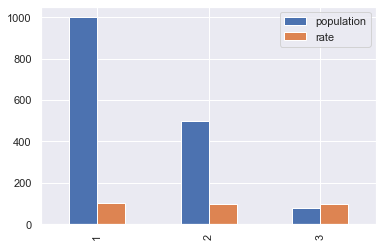

In [470]:
my_dataframe3.plot.bar()

In [471]:
my_dataframe3.loc[1] # get row, label based index

city          stockholm
population         1000
rate                100
Name: 1, dtype: object

In [498]:
my_dataframe3.a[1] # implicit positional indexing 

city          Gothenburg
population           500
rate                  90
western             True
Name: 2, dtype: object

In [473]:
my_dataframe3.loc[1:3] # label based index so it does include the last one

,city,population,rate
1,stockholm,1000,100
2,Gothenburg,500,98
3,Uppsala,80,97


In [497]:
my_dataframe3.loc[1:2, ["city","rate"]] # [row range, column range]

,city,rate
1,Shanghai,100.0
2,Gothenburg,90.0


In [475]:
my_dataframe3.iloc[0,1] = 1500 # assignment to dataframe‘s cell
my_dataframe3

,city,population,rate
1,stockholm,1500,100
2,Gothenburg,500,98
3,Uppsala,80,97


In [476]:
my_dataframe3['population'][0:-1]# slicing

1    1500
2     500
Name: population, dtype: int64

In [477]:
my_dataframe3.loc[1] = ("Shanghai",2000,90) # assignment to dataframe's row
my_dataframe3 

,city,population,rate
1,Shanghai,2000,90
2,Gothenburg,500,98
3,Uppsala,80,97


In [478]:
# use series and index to change certain rows 
val = pd.Series([100,101],index= [1,3])
val

1    100
3    101
dtype: int64

In [479]:
my_dataframe3['rate'] = val
my_dataframe3

,city,population,rate
1,Shanghai,2000,100.0
2,Gothenburg,500,NaN
3,Uppsala,80,101.0


In [480]:
my_dataframe3.iloc[1,2]  = 90
my_dataframe3

,city,population,rate
1,Shanghai,2000,100.0
2,Gothenburg,500,90.0
3,Uppsala,80,101.0


In [481]:
my_dataframe3['western'] = (my_dataframe3.city == 'Gothenburg')
my_dataframe3

,city,population,rate,western
1,Shanghai,2000,100.0,False
2,Gothenburg,500,90.0,True
3,Uppsala,80,101.0,False


In [482]:
# index object
my_dataframe3.columns

Index(['city', 'population', 'rate', 'western'], dtype='object')

In [483]:
my_dataframe3.index

Int64Index([1, 2, 3], dtype='int64')

In [484]:
my_dataframe3.loc[my_dataframe3["population"] < 1000, ["city","population","rate"]] # masking and fancy indexing (explicit indexing)

,city,population,rate
2,Gothenburg,500,90.0
3,Uppsala,80,101.0


### Other methods to create dataframe

In [485]:
# 4. Create dataframe with list of dict (from the row perspective)
dictionalry_data = [{"age":i,"expirence":i*2} for i in range(10,15)]
experience_df = pd.DataFrame(dictionalry_data)
experience_df

,age,expirence
0,10,20
1,11,22
2,12,24
3,13,26
4,14,28


In [486]:
# 5. Create dataframe with 2D array
rain_possibility = pd.DataFrame(np.random.rand(3,5),
                                columns= ["Monday","Tuesday","Wednesdsay","Thursday","Friday"],
                                index=["Chongqing","Shanghai","Uppsala"])
rain_possibility

,Monday,Tuesday,Wednesdsay,Thursday,Friday
Chongqing,0.677383,0.480113,0.349477,0.097669,0.460136
Shanghai,0.282980,0.008802,0.412742,0.737016,0.707299
Uppsala,0.077654,0.108219,0.016064,0.993090,0.294466


In [487]:
rain_possibility.index.name = "city"
rain_possibility.columns.name = "Week"
rain_possibility

Week,Monday,Tuesday,Wednesdsay,Thursday,Friday
city,,,,,
Chongqing,0.677383,0.480113,0.349477,0.097669,0.460136
Shanghai,0.282980,0.008802,0.412742,0.737016,0.707299
Uppsala,0.077654,0.108219,0.016064,0.993090,0.294466


In [488]:
rain_possibility.values

array([[0.67738265, 0.48011265, 0.34947679, 0.0976686 , 0.46013579],
       [0.28298009, 0.00880237, 0.41274238, 0.73701644, 0.70729917],
       [0.07765421, 0.10821908, 0.01606352, 0.99308988, 0.29446575]])

## Index as immutable array

In [489]:
rain_possibility.index

Index(['Chongqing', 'Shanghai', 'Uppsala'], dtype='object', name='city')

In [490]:
rain_possibility.index.size

3

In [491]:
rain_possibility.index.shape

(3,)

In [492]:
rain_possibility.index = ["Chongqing","Shanghai","Gothenburg"]  # can only change the entire index
rain_possibility

Week,Monday,Tuesday,Wednesdsay,Thursday,Friday
Chongqing,0.677383,0.480113,0.349477,0.097669,0.460136
Shanghai,0.282980,0.008802,0.412742,0.737016,0.707299
Gothenburg,0.077654,0.108219,0.016064,0.993090,0.294466


In [493]:
index = pd.Index(np.arange(3))
index

Int64Index([0, 1, 2], dtype='int64')

### Reindexing

In [500]:
my_series

row 1    a
row 2    b
row 3    c
dtype: object

In [505]:
my_series.reindex(["row 4","row 3","row 2","row 1"])


row 4    NaN
row 3      c
row 2      b
row 1      a
dtype: object

In [507]:
my_series.reindex(["row 4","row 3","row 2","row 1"],fill_value = 'x')

row 4    x
row 3    c
row 2    b
row 1    a
dtype: object

In [512]:
new_series = pd.Series(np.arange(0,10,2))
print(new_series)
new_series.reindex(range(6),method ='ffill')

0    0
1    2
2    4
3    6
4    8
dtype: int64


0    0
1    2
2    4
3    6
4    8
5    8
dtype: int64

In [513]:
new_series.reindex(range(6),method ='bfill')

0    0.0
1    2.0
2    4.0
3    6.0
4    8.0
5    NaN
dtype: float64

In [524]:
my_dataframe3.reindex([3,2,1])

,city,population,rate,western
3,Uppsala,80,101.0,False
2,Gothenburg,500,90.0,True
1,Shanghai,2000,100.0,False


In [523]:
my_dataframe3.reindex(columns = ["city", "rate", "population","western"])

,city,population,rate,western
1,Shanghai,2000,100.0,False
2,Gothenburg,500,90.0,True
3,Uppsala,80,101.0,False


### Drop series and dataframe's index

In [525]:
my_series

row 1    a
row 2    b
row 3    c
dtype: object

In [526]:
my_series.drop("row 1")

row 2    b
row 3    c
dtype: object

In [527]:
my_series.drop(["row 1","row 3"])

row 2    b
dtype: object

In [528]:
my_dataframe

,city,year,population
1,Stockholm,2015,1000
2,Gothenburg,2016,500
3,Uppsala,2017,80


In [529]:
my_dataframe.drop([1,2])

,city,year,population
3,Uppsala,2017,80


In [531]:
my_dataframe.drop('year',axis = 1)

,city,population
1,Stockholm,1000
2,Gothenburg,500
3,Uppsala,80


### Hierarchical index

In [532]:
data = pd.Series(np.random.rand(10),
                index= [['a','a','a','a','b','b','b','c','c','c'],
                       [1,2,3,4,1,2,3,1,2,3]])
data

a  1    0.539919
   2    0.326772
   3    0.330768
   4    0.937579
b  1    0.812093
   2    0.108707
   3    0.290760
c  1    0.026748
   2    0.594386
   3    0.869030
dtype: float64

In [533]:
data.index

MultiIndex(levels=[['a', 'b', 'c'], [1, 2, 3, 4]],
           codes=[[0, 0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 3, 0, 1, 2, 0, 1, 2]])

In [535]:
data["b":"c"]

b  1    0.812093
   2    0.108707
   3    0.290760
c  1    0.026748
   2    0.594386
   3    0.869030
dtype: float64

In [536]:
data.unstack() # hierarchical index and dataframe can be converted to each other

,1,2,3,4
a,0.539919,0.326772,0.330768,0.937579
b,0.812093,0.108707,0.290760,NaN
c,0.026748,0.594386,0.869030,NaN


In [537]:
data.unstack().stack()

a  1    0.539919
   2    0.326772
   3    0.330768
   4    0.937579
b  1    0.812093
   2    0.108707
   3    0.290760
c  1    0.026748
   2    0.594386
   3    0.869030
dtype: float64

In [554]:
# method 1 to create hierarchical index
df = pd.DataFrame(np.random.rand(4,2), columns = ["Class1","Class2"], index= [["Morning","Morning","Afternoon","Afternoon"],["Math","Nature","Math","PE"]])
print(df)
df.index.names = ["Time", "Subject"]
print()
print(df)

                    Class1    Class2
Morning   Math    0.465836  0.435332
          Nature  0.569479  0.969259
Afternoon Math    0.040556  0.548120
          PE      0.462577  0.376472

                     Class1    Class2
Time      Subject                    
Morning   Math     0.465836  0.435332
          Nature   0.569479  0.969259
Afternoon Math     0.040556  0.548120
          PE       0.462577  0.376472


In [543]:
index = pd.MultiIndex.from_arrays([["Morning","Morning","Afternoon","Afternoon"],["Math","PE","Math","PE"]])
s1 = pd.Series([1,20,55,99],index=[('Morning', 'Math'), ('Morning', 'PE'), ('Afternoon', 'Math'), ('Afternoon', 'PE')])
s1 = s1.reindex(index)
print("index from arrays:")
print(s1)

index from arrays:
Morning    Math     1
           PE      20
Afternoon  Math    55
           PE      99
dtype: int64


In [544]:
# method 2 to create hierarchical index

array = [["Morning","Morning","Afternoon","Afternoon"],["Math","PE","Math","PE"]]
#The * operator can be used in conjuncton with zip() to unzip the list.
list_of_tuples = list(zip(*array)) # [('Morning', 'Math'), ('Morning', 'PE'), ('Afternoon', 'Math'), ('Afternoon', 'PE')]
print(list_of_tuples)
new_index=pd.MultiIndex.from_tuples(list_of_tuples)

s1 = pd.Series([1,20,55,99],index=new_index)
print("create series with new_index:")
print(s1)

print("or use reindex:")
s1 = s1.reindex(new_index)
print(s1)


[('Morning', 'Math'), ('Morning', 'PE'), ('Afternoon', 'Math'), ('Afternoon', 'PE')]
create series with new_index:
Morning    Math     1
           PE      20
Afternoon  Math    55
           PE      99
dtype: int64
or use reindex:
Morning    Math     1
           PE      20
Afternoon  Math    55
           PE      99
dtype: int64


In [545]:
# method 3:using dict with tuple as key!
s2 = pd.Series({('Morning', 'Math'):100, ('Morning', 'PE'):200, ('Afternoon', 'Math'):300,('Afternoon', 'PE'):400})
print(s2)


Morning    Math    100
           PE      200
Afternoon  Math    300
           PE      400
dtype: int64


In [557]:
pop_index = pd.MultiIndex.from_product([["Chongqing","Shanghai","Gothenburg"],
                                       [2000,2010]],names=["City","Year"])
pop = pd.Series([30000000,32000000,21000000,28000000,950000,1000000],index=pop_index)
print(pop)

# multiple levels for columns (DataFrame)
print("")
print("# multiple levels for columns (DataFrame)")
np.random.seed(1234)
C = np.random.randint(0,1000,size=(6,4))
row_index = pd.MultiIndex.from_product([["Chongqing","Shanghai","Gothenburg"],
                                       [2000,2010]],names=["City","Year"])

column_index = pd.MultiIndex.from_product([["Urban","Rural"],
                                       ["Woman","Man"]],names=["Geo","Gender"])

health_data = pd.DataFrame(C,index=row_index,columns=column_index)
print(health_data)
print("Urban data:")
print(health_data["Urban"])
print("")
print("Urban and man:")
# applies to only column
print(health_data["Urban","Man"]) 
print()
# applies to row
print("Chongqing in 2000:")
print(health_data.loc["Chongqing",2000])
print(health_data.iloc[0])

#applies to column and row：
print(health_data.iloc[:2,:2])

print("")
print("2010, woman:")
idx = pd.IndexSlice
print(health_data.loc[idx[:,2010],idx[:,"Woman"]])

City        Year
Chongqing   2000    30000000
            2010    32000000
Shanghai    2000    21000000
            2010    28000000
Gothenburg  2000      950000
            2010     1000000
dtype: int64

# multiple levels for columns (DataFrame)
Geo             Urban      Rural     
Gender          Woman  Man Woman  Man
City       Year                      
Chongqing  2000   815  723   294   53
           2010   204  372   664  655
Shanghai   2000   689  279   233  154
           2010    30  683   158  748
Gothenburg 2000   892  794   374  442
           2010   120  880   476  325
Urban data:
Gender           Woman  Man
City       Year            
Chongqing  2000    815  723
           2010    204  372
Shanghai   2000    689  279
           2010     30  683
Gothenburg 2000    892  794
           2010    120  880

Urban and man:
City        Year
Chongqing   2000    723
            2010    372
Shanghai    2000    279
            2010    683
Gothenburg  2000    794
            2010    88

In [558]:
health_data.loc["Chongqing",2000]['Urban']['Woman']

815

In [562]:
# specify level to suggest level you want to explore (row wise)
# and specify axis to suggest on the column
print(health_data)
city_avg = health_data.mean(level= "City")
print("Each city's average data:\n", city_avg)

Geo             Urban      Rural     
Gender          Woman  Man Woman  Man
City       Year                      
Chongqing  2000   815  723   294   53
           2010   204  372   664  655
Shanghai   2000   689  279   233  154
           2010    30  683   158  748
Gothenburg 2000   892  794   374  442
           2010   120  880   476  325
Each city's average data:
 Geo         Urban         Rural       
Gender      Woman    Man  Woman    Man
City                                  
Chongqing   509.5  547.5  479.0  354.0
Shanghai    359.5  481.0  195.5  451.0
Gothenburg  506.0  837.0  425.0  383.5


In [563]:

print(city_avg.mean(axis= 1, level = "Gender"))

Gender       Woman     Man
City                      
Chongqing   494.25  450.75
Shanghai    277.50  466.00
Gothenburg  465.50  610.25


## Math

In [399]:
apts / 2

BJ     500.0
SH    1000.0
HZ    2500.0
dtype: float64

In [715]:
x = pd.Series([1, 2, 2, np.nan], index=['p', 'q', 'r', 's'])
x

p    1.0
q    2.0
r    2.0
s    NaN
dtype: float64

In [723]:
y = pd.Series([2, np.nan, 1, 1], index=['p', 'q', 's', 't'])
y

p    2.0
q    NaN
s    1.0
t    1.0
dtype: float64

In [718]:
x.add(y, fill_value=0)

p    1.0
q    2.0
r    2.0
s    NaN
dtype: float64

In [400]:
np.square(apts)

BJ     1000000
SH     4000000
HZ    25000000
dtype: int64

In [401]:
cars = pd.Series({"BJ":2000,"SH":1000, "CQ":500})
price = cars + apts* 100
print(price)

BJ    102000.0
CQ         NaN
HZ         NaN
SH    201000.0
dtype: float64


In [402]:
price[price.notnull()]

BJ    102000.0
SH    201000.0
dtype: float64

## Merge, Join and Concatenate

### Concat

In [564]:
def make_a_quick_df(cols, ind):
    data = { c :[str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data,index=ind)

make_a_quick_df("ABC",range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [565]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
print("np.concatenation:")
print(np.concatenate([x,y,z]))

np.concatenation:
[1 2 3 4 5 6 7 8 9]


In [566]:
x = [[1,2],
     [3,4]]
print("horizontally \n",np.concatenate([x,x], axis= 1))
print("vertically \n",np.concatenate([x,x], axis= 0))

horizontally 
 [[1 2 1 2]
 [3 4 3 4]]
vertically 
 [[1 2]
 [3 4]
 [1 2]
 [3 4]]


In [567]:
series1 = pd.Series(["a","b","c"],index = [1,2,3])
series2 = pd.Series(["d","e","f"], index = [4,5,6])
print("concat 2 series:")
print(pd.concat([series1,series2]))


concat 2 series:
1    a
2    b
3    c
4    d
5    e
6    f
dtype: object


In [603]:
df1 =  make_a_quick_df("AB",[1,2])
df2 = make_a_quick_df("AB",[3,4])
print(df1)
print(df2)
pd.concat([df1,df2]) #default is axis=0

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4


,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [604]:
pd.concat([df1,df2], keys = ["x","y"]) #default is axis=0 but use key to get hierarchical index

A   B
x 1  A1  B1
  2  A2  B2
y 3  A3  B3
  4  A4  B4

In [612]:
pd.concat([df1,df2], keys = ["x","y"]).loc[idx[:,1:3], idx["A"]]

x  1    A1
   2    A2
y  3    A3
Name: A, dtype: object

In [605]:
pd.concat([df1,df2], axis= 1, keys = ["x","y"]) #default is axis=0

x         y     
     A    B    A    B
1   A1   B1  NaN  NaN
2   A2   B2  NaN  NaN
3  NaN  NaN   A3   B3
4  NaN  NaN   A4   B4

In [570]:
X = make_a_quick_df("AB",[0,1])
Y = make_a_quick_df("AB",[0,1])
print("repeat index:")
try:
    pd.concat([X, Y],verify_integrity=True)
except ValueError as e:
    print("ValueError:",e)
print("ignore the index:")
print(pd.concat([X,Y],ignore_index=True))

repeat index:
ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')
ignore the index:
    A   B
0  A0  B0
1  A1  B1
2  A0  B0
3  A1  B1


In [572]:
print("adding multiple keys:")
print(pd.concat([X,Y],keys=["year_2000", "year_2001"]))

adding multiple keys:
              A   B
year_2000 0  A0  B0
          1  A1  B1
year_2001 0  A0  B0
          1  A1  B1


In [575]:
print("contatenation with joins")
x2= make_a_quick_df("ABC",[1,2])
y2 = make_a_quick_df("BCD",[3,4])
print(x2)
print(y2)


contatenation with joins
    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


In [576]:
print("default is outer:")
print(pd.concat([x2,y2]))

default is outer:
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


/Users/yemao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [577]:
print("change to inner:")
print(pd.concat([x2,y2],join = "inner"))

change to inner:
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [578]:
print("Or use columns from one data source:")
print(pd.concat([x2,y2],join_axes=[x2.columns]))

Or use columns from one data source:
     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


In [580]:
print("Using append achieves the same goal:")
print(x2.append(y2))

Using append achieves the same goal:
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [615]:
X = make_a_quick_df("AB",[0,1])
X

,A,B
0,A0,B0
1,A1,B1


In [616]:
s1= pd.Series(["C0","C1"], index = [0,1], name = "C")
s1

0    C0
1    C1
Name: C, dtype: object

In [617]:
pd.concat([X,s1], axis = 1) # concat series and df

,A,B,C
0,A0,B0,C0
1,A1,B1,C1


### Merge and Join

In [727]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
print(df1)
print(df2)
df3 = pd.merge(df1,df2)
print("df3:\n",df3)



  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
df3:
   employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [728]:
print("using the on keyword:")
print(pd.merge(df1,df2, on = "employee")) # will remove those which shows in table but not in another table

using the on keyword:
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [624]:
pd.merge(df1,df2, on = "employee", how = 'outer') # keep all the data

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [585]:

df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
print(df4)
print("merge df3 and df4:")
print(pd.merge(df3,df4))



         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
merge df3 and df4:
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [586]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
print(df1)
print(df5)
print("many to many merge:")
print(pd.merge(df1,df5))


  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
many to many merge:
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


In [725]:
print(df1)
print(df3)
print("merging with different column names:")

df3 = pd.DataFrame({'name': ['Jake', 'Bob', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
print(pd.merge(df1,df3, left_on = "employee", right_on ="name")) # column-column merge



  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
merging with different column names:
  employee        group  name  salary
0      Bob   Accounting   Bob   80000
1     Jake  Engineering  Jake   70000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [726]:
df_random =  pd.DataFrame({'SomeA': ['J', 'B', 'L', 'S'],
                    'SomeB': [7, 8, 12, 9]})

print(pd.merge(df3,df_random,left_index = True, right_index = True))

   name  salary SomeA  SomeB
0  Jake   70000     J      7
1   Bob   80000     B      8
2  Lisa  120000     L     12
3   Sue   90000     S      9


In [590]:
print("then drop the redundant column")
print(pd.merge(df1,df3, left_on = "employee", right_on ="name").drop("name", axis=1))

then drop the redundant column
  employee        group  salary
0      Bob   Accounting   80000
1     Jake  Engineering   70000
2     Lisa  Engineering  120000
3      Sue           HR   90000


#### Join is used on the indices

In [591]:
mer = df1.set_index('employee')
df2a = df2.set_index('employee')
print("df1a:")
print(df1a)
print("df2a:")
print(df2a)
print("join method perform a merge that defaults to join on indices")
print(df1a.join(df2a))

df1a:
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
df2a:
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
join method perform a merge that defaults to join on indices
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [593]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df6

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


In [594]:
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
df7

,name,drink
0,Mary,wine
1,Joseph,beer


In [596]:
print("default is inner join to find intersection:")
pd.merge(df6, df7)


default is inner join to find intersection:


,name,food,drink
0,Mary,bread,wine


In [597]:
print('this is outer join:')
pd.merge(df6, df7, how='outer')

this is outer join:


,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [598]:
print('this is left join:')
pd.merge(df6, df7, how='left')

this is left join:


,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [599]:
print('this is right join:')
pd.merge(df6, df7, how='right')

this is right join:


,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


In [600]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
print(df8)
print(df9)

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2


In [601]:
print(pd.merge(df8,df9, on="name"))
pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])

   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


 #### Two examples

In [680]:
pop = pd.read_csv("../data/state-population.csv")
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [627]:
areas = pd.read_csv("../data/state-areas.csv")
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [629]:
abbrevs = pd.read_csv("../data/state-abbrevs.csv")
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [637]:
merged = pd.merge(pop, abbrevs, how="outer", left_on= "state/region", right_on="abbreviation")
merged = merged.drop("abbreviation", axis=1)
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [633]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [634]:
print(merged[merged['population'].isnull()])
print(merged.loc[merged["state"].isnull(), "state/region"].unique())

     state/region     ages  year  population state
2448           PR  under18  1990         NaN   NaN
2449           PR    total  1990         NaN   NaN
2450           PR    total  1991         NaN   NaN
2451           PR  under18  1991         NaN   NaN
2452           PR    total  1993         NaN   NaN
2453           PR  under18  1993         NaN   NaN
2454           PR  under18  1992         NaN   NaN
2455           PR    total  1992         NaN   NaN
2456           PR  under18  1994         NaN   NaN
2457           PR    total  1994         NaN   NaN
2458           PR    total  1995         NaN   NaN
2459           PR  under18  1995         NaN   NaN
2460           PR  under18  1996         NaN   NaN
2461           PR    total  1996         NaN   NaN
2462           PR  under18  1998         NaN   NaN
2463           PR    total  1998         NaN   NaN
2464           PR    total  1997         NaN   NaN
2465           PR  under18  1997         NaN   NaN
2466           PR    total  199

In [635]:
merged.loc[merged["state/region"]=="PR", "state"]= "Puerto Rico"
merged.loc[merged["state/region"] == "USA", "state"] = "United States"
print(merged.isnull().any())

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool


In [636]:
final = pd.merge(merged, areas, on = "state",how="left")
print(final.head())
print(final.isnull().any())

  state/region     ages  year  population    state  area (sq. mi)
0           AL  under18  2012   1117489.0  Alabama        52423.0
1           AL    total  2012   4817528.0  Alabama        52423.0
2           AL  under18  2010   1130966.0  Alabama        52423.0
3           AL    total  2010   4785570.0  Alabama        52423.0
4           AL  under18  2011   1125763.0  Alabama        52423.0
state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool


In [638]:
print(final.loc[final["area (sq. mi)"].isnull(), "state"].unique())

['United States']


In [639]:
final = final.dropna()
print(final.isnull().any())

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool


In [640]:
data2010 = final.query("year == 2010 & ages == 'total'") # query
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [645]:
data2010.set_index("state",inplace = True)
data2010

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0
Colorado,CO,total,2010,5048196.0,104100.0
Connecticut,CT,total,2010,3579210.0,5544.0
Delaware,DE,total,2010,899711.0,1954.0
District of Columbia,DC,total,2010,605125.0,68.0


In [646]:
density = data2010["population"]/data2010["area (sq. mi)"]
density.sort_values(ascending=False,inplace = True)

In [647]:
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [685]:
bike_data = pd.read_csv('../data/bikes.csv',encoding="latin1", sep=';', parse_dates = ['Date'], dayfirst = True, index_col = "Date")
bike_data.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [687]:
bike_data.isnull().any()

Berri 1                                False
Brébeuf (données non disponibles)       True
Côte-Sainte-Catherine                  False
Maisonneuve 1                          False
Maisonneuve 2                          False
du Parc                                False
Pierre-Dupuy                           False
Rachel1                                False
St-Urbain (données non disponibles)     True
dtype: bool

In [688]:
bike_data.dropna(how = "all",axis=1).head() # delete columns that have all 'NaN'

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95


In [703]:
berri_bikes = bike_data[['Berri 1']].copy()
berri_bikes

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197
2012-01-06,146
2012-01-07,98
2012-01-08,95
2012-01-09,244


In [704]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [696]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [724]:
berri_bikes['weekday'] = berri_bikes.index.weekday
berri_bikes.head()
berri_bikes['weekday'].value_counts()

6    45
0    45
5    44
4    44
3    44
2    44
1    44
Name: weekday, dtype: int64

In [706]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


In [707]:
bikes_sum = bike_data.sum(axis =1).to_frame(name = "Sum") # Series to Dataframe

In [708]:
bikes_sum.head()

,Sum
Date,
2012-01-01,176.0
2012-01-02,407.0
2012-01-03,639.0
2012-01-04,759.0
2012-01-05,858.0


In [710]:
bikes_sum.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [711]:
bikes_sum['weekday'] = bikes_sum.index.weekday

In [713]:
bikes_sum.head()

,Sum,weekday
Date,,
2012-01-01,176.0,6
2012-01-02,407.0,0
2012-01-03,639.0,1
2012-01-04,759.0,2
2012-01-05,858.0,3


In [714]:
bikes_sum = bikes_sum.groupby('weekday').aggregate(sum)
bikes_sum

,Sum
weekday,
0,714963.0
1,698582.0
2,789722.0
3,829069.0
4,738772.0
5,516701.0
6,518047.0


## Groupby and Aggregate

In [ ]:
#mean_total_co_day = daily_data[['weekday', 'cnt']].groupby('weekday').agg([np.mean, np.std])

In [651]:
import seaborn as sns
planets = sns.load_dataset("planets")
print(planets.shape)
print(planets.head())

(1035, 6)
            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009


In [654]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(6))
print(ser)
print(ser.sum())
print(ser.mean())

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
5    0.155995
dtype: float64
2.9679200120443596
0.4946533353407266


In [655]:
print(planets.dropna().describe()) # describe is useful to see the overview

          number  orbital_period        mass    distance         year
count  498.00000      498.000000  498.000000  498.000000   498.000000
mean     1.73494      835.778671    2.509320   52.068213  2007.377510
std      1.17572     1469.128259    3.636274   46.596041     4.167284
min      1.00000        1.328300    0.003600    1.350000  1989.000000
25%      1.00000       38.272250    0.212500   24.497500  2005.000000
50%      1.00000      357.000000    1.245000   39.940000  2009.000000
75%      2.00000      999.600000    2.867500   59.332500  2011.000000
max      6.00000    17337.500000   25.000000  354.000000  2014.000000


In [657]:
for (method, group) in planets.groupby("method"):
    print("{0:30s}, shape = {1}".format(method,group.shape))

Astrometry                    , shape = (2, 6)
Eclipse Timing Variations     , shape = (9, 6)
Imaging                       , shape = (38, 6)
Microlensing                  , shape = (23, 6)
Orbital Brightness Modulation , shape = (3, 6)
Pulsar Timing                 , shape = (5, 6)
Pulsation Timing Variations   , shape = (1, 6)
Radial Velocity               , shape = (553, 6)
Transit                       , shape = (397, 6)
Transit Timing Variations     , shape = (4, 6)


In [658]:
print(planets.groupby("method")['year'].describe())

                               count         mean       std     min      25%  \
method                                                                         
Astrometry                       2.0  2011.500000  2.121320  2010.0  2010.75   
Eclipse Timing Variations        9.0  2010.000000  1.414214  2008.0  2009.00   
Imaging                         38.0  2009.131579  2.781901  2004.0  2008.00   
Microlensing                    23.0  2009.782609  2.859697  2004.0  2008.00   
Orbital Brightness Modulation    3.0  2011.666667  1.154701  2011.0  2011.00   
Pulsar Timing                    5.0  1998.400000  8.384510  1992.0  1992.00   
Pulsation Timing Variations      1.0  2007.000000       NaN  2007.0  2007.00   
Radial Velocity                553.0  2007.518987  4.249052  1989.0  2005.00   
Transit                        397.0  2011.236776  2.077867  2002.0  2010.00   
Transit Timing Variations        4.0  2012.500000  1.290994  2011.0  2011.75   

                                  50%  

In [659]:
print(planets.groupby("method")['year'].describe().unstack())

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

In [729]:
df = pd.DataFrame({"key":['A','B','C','A','B','C'], "data":range(6)})
df["volumn"] = np.random.randint(1990,1992,6)
df

,key,data,volumn
0,A,0,1990
1,B,1,1991
2,C,2,1990
3,A,3,1991
4,B,4,1991
5,C,5,1990


In [730]:
groupby_by_key = df.groupby("key") # a structure like the dataframe or series. 

In [734]:
groupby_by_key.aggregate(max)

,data,volumn
key,,
A,3,1991
B,4,1991
C,5,1990


In [735]:
groupby_by_key.aggregate(sum)

,data,volumn
key,,
A,3,3981
B,5,3982
C,7,3980


In [736]:
groupby_by_key.mean()

,data,volumn
key,,
A,1.5,1990.5
B,2.5,1991.0
C,3.5,1990.0


In [676]:
for (key, group) in groupby_by_key:
    print(f"{key}:\n{group}")

A:
  key  data  volumn
0   A     0    1991
3   A     3    1991
B:
  key  data  volumn
1   B     1    1990
4   B     4    1991
C:
  key  data  volumn
2   C     2    1991
5   C     5    1991


In [677]:
groupby_key_and_volumn = df.groupby(['key','volumn'])
groupby_key_and_volumn.sum()

data
key volumn      
A   1991       3
B   1990       1
    1991       4
C   1991       7

In [678]:
groupby_key_and_volumn.size()

key  volumn
A    1991      2
B    1990      1
     1991      1
C    1991      2
dtype: int64

In [679]:
groupby_key_and_volumn.describe()

data                                         
           count mean      std  min   25%  50%   75%  max
key volumn                                               
A   1991     2.0  1.5  2.12132  0.0  0.75  1.5  2.25  3.0
B   1990     1.0  1.0      NaN  1.0  1.00  1.0  1.00  1.0
    1991     1.0  4.0      NaN  4.0  4.00  4.0  4.00  4.0
C   1991     2.0  3.5  2.12132  2.0  2.75  3.5  4.25  5.0